## Introduction to the Sample Final Test

Dear Students,

Welcome to the sample final test for our laboratory course. This test is designed to assess your understanding and application of the concepts and techniques we have covered throughout the semester. 

Instructions:

Read Each Question Carefully: Ensure you understand what is being asked before you start coding.

Write Clean and Commented Code: Your code should be well-organized and include comments explaining your logic.

Test Your Code: Make sure to test your code with different inputs to ensure it works correctly.

Conclusions: Make final decisions, decide about the statistical and practical significance. 

Resources:

You are allowed to use your notes, textbooks, and online resources to help you complete the test. 

**Please be advised that the use of any Generative AI (GenAI) tools is strictly prohibited during this test. This includes, but is not limited to, tools that generate code, text, or any other form of content based on AI algorithms.**

Collaboration with classmates is not permitted. This test is an individual assessment of your skills.

I encourage you to take your time and approach each question methodically. This test is an opportunity to demonstrate your proficiency and understanding of the material. 

Best regards,

Karol
/Mathematical Statistics 2024/2025/



# Task 1: Verify the Hypothesis

Objective: Verify the hypothesis that the salaries of professors working in theoretical departments (B) are much lower than those working in applied departments (A).

In [10]:
import pandas as pd

# Load the Salaries dataset from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

# Filter the data based on the department type
theoretical_salaries = salaries[salaries['discipline'] == 'B']['salary']
applied_salaries = salaries[salaries['discipline'] == 'A']['salary']

# Display the first few rows of the dataset
print(salaries)

     rownames      rank discipline  yrs.since.phd  yrs.service   sex  salary
0           1      Prof          B             19           18  Male  139750
1           2      Prof          B             20           16  Male  173200
2           3  AsstProf          B              4            3  Male   79750
3           4      Prof          B             45           39  Male  115000
4           5      Prof          B             40           41  Male  141500
..        ...       ...        ...            ...          ...   ...     ...
392       393      Prof          A             33           30  Male  103106
393       394      Prof          A             31           19  Male  150564
394       395      Prof          A             42           25  Male  101738
395       396      Prof          A             25           15  Male   95329
396       397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


## Normality

ShapiroResult(statistic=0.9879514552107148, pvalue=0.06559041632671048)
ShapiroResult(statistic=0.9891412860397887, pvalue=0.1021670726374912)


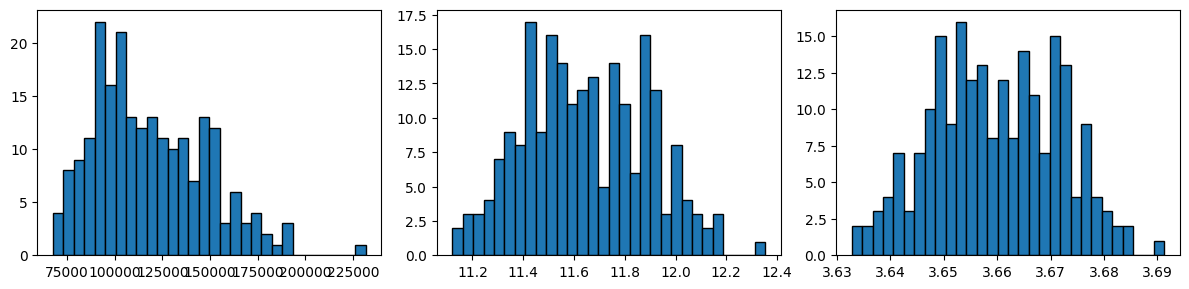

ShapiroResult(statistic=0.981501311833227, pvalue=0.01677562195045212)
ShapiroResult(statistic=0.9850858810631471, pvalue=0.05130286095942916)


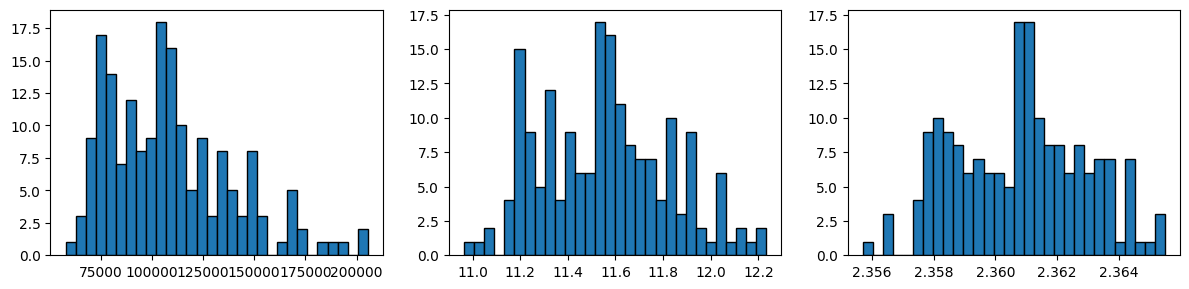

NameError: name 'sm' is not defined

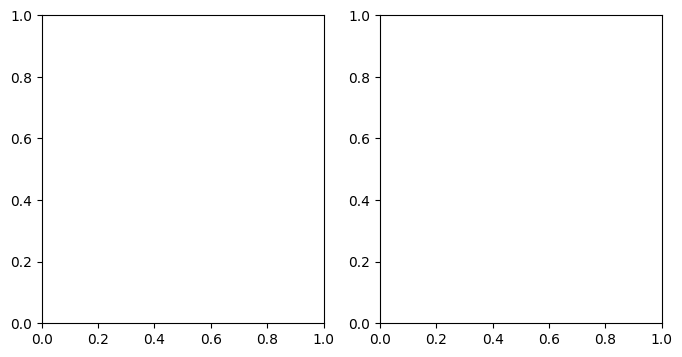

In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

boxcox_th_salaries, _ = stats.boxcox(theoretical_salaries)
th_salaries = np.array(boxcox_th_salaries)
print(stats.shapiro(np.log(theoretical_salaries)))
print(stats.shapiro(th_salaries))
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(theoretical_salaries, bins=30, edgecolor='black')
axs[1].hist(np.log(theoretical_salaries), bins=30, edgecolor='black')
axs[2].hist(th_salaries, bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

boxcox_th_salaries, _ = stats.boxcox(applied_salaries)
th_salaries = np.array(boxcox_th_salaries)
print(stats.shapiro(np.log(applied_salaries)))
print(stats.shapiro(th_salaries))
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(applied_salaries, bins=30, edgecolor='black')
axs[1].hist(np.log(applied_salaries), bins=30, edgecolor='black')
axs[2].hist(th_salaries, bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


disciplines = salaries['discipline'].unique()
fig, axes = plt.subplots(1, len(disciplines), figsize=(8, 4))

for i, discipline in enumerate(disciplines):
    data = salaries[salaries['discipline'] == discipline]['salary']
    sm.qqplot(data, line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {discipline}')

plt.tight_layout()
plt.show()

# Task 2: Verify the Hypothesis

Objective: Verify if the proportion of higher rank professors (associate and full professors) is significantly different between male and female scientists.

In [83]:
th = np.log(theoretical_salaries)
ap = np.log(applied_salaries)
print(th.var(), ap.var())
stats.levene(ap, th)

0.059692829622860676 0.07311094768038473


LeveneResult(statistic=0.8267892464165671, pvalue=0.3637570669103217)

# Task 3: Verify the Hypothesis

Objective: Verify if the salaries of professors are significantly different based on rank, gender, and discipline, and check for interactions between these groups.

In [97]:
n_t = len(th)
n_a = len(ap)
mean_t = th.mean()
mean_a = ap.mean()
var_t = th.var()
var_a = ap.var()

pulled_var = ((n_t - 1) * var_t + (n_a - 1) * var_a) / (n_t + n_a - 2)
t = (mean_t - mean_a) / np.sqrt(pulled_var * (1 / n_t + 1 / n_a))
print(np.sqrt(var_a), var_t)
print(mean_a, mean_t)

print((1 - stats.t.cdf(t, n_t + n_a - 2)) * 2)

print(stats.ttest_ind(ap, th, equal_var=True))

0.270390361663253 0.059692829622860676
11.557895054398498 11.648726289335025
0.0004930007802934622
TtestResult(statistic=-3.513732636743348, pvalue=0.0004930007802933415, df=395.0)


# Task 4: Verify the Hypothesis

Objective: Verify if credit amounts (in DM) are significantly different for people applying with different job, personal status, sex, or age.

<Axes: >

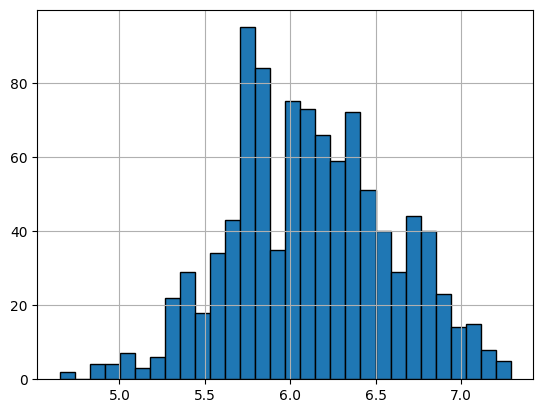

In [ ]:
import pandas as pd

# Load the GermanCredit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset

#print(germancredit.head())
germancredit['box_amount'], _ = stats.boxcox(germancredit['amount'])
stats.shapiro(germancredit['box_amount'])
germancredit['box_amount'].hist(bins=30, edgecolor='black')



In [ ]:
#print(germancredit.info())



In [40]:
# your solution

# Task 5: Evaluate Interaction Between Group and Time

Description: 

The data provide the anxiety score, measured at three time points, of three groups of individuals practicing physical exercises at different levels (grp1: basal, grp2: moderate and grp3: high)

Objective: Evaluate if there is an interaction between group and time in explaining anxiety scores.

In [ ]:
import pandas as pd

# Load the anxiety dataset from GitHub
url = "https://raw.githubusercontent.com/kflisikowski/ds/master/anxiety.csv"
anxiety_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(anxiety_data.head())

   Unnamed: 0  id group    t1    t2    t3
0           1   1  grp1  14.1  14.4  14.1
1           2   2  grp1  14.5  14.6  14.3
2           3   3  grp1  15.7  15.2  14.9
3           4   4  grp1  16.0  15.5  15.3
4           5   5  grp1  16.5  15.8  15.7


In [ ]:
# your solution
import pingouin as pg
data = pd.melt(anxiety_data,id_vars=['id', 'group'], value_vars=['t1', 't2', 't3'] , var_name='time', value_name='score')
pg.rm_anova(dv='score', within='time', subject='id', data=data, detailed=True)
# it is changeing p = 2*10^-18

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,time,66.578815,2,33.289407,66.225833,2.827799e-18,1.657730e-11,0.141072,0.574434,False,0.259155,2.463413e-13
1,Error,44.234519,88,0.502665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 6: Evaluate the Goodness of Fit

Objective: Use the goodness of fit test to determine whether the distribution of credit amounts for male customers matches that of female customers.

In [8]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)
#print(germancredit.head())

In [171]:

germancredit['gender'] =germancredit['personal_status_sex'].str.split(' : ').str[0]
expected = [data['amount'].mean()] * len(germancredit['amount'])

stats.chisquare(f_obs=germancredit['amount'], f_exp=expected)

Power_divergenceResult(statistic=2433276.625517156, pvalue=0.0)

# Task 7: Evaluate the Change in Asthma Symptoms Over Time

Objective: determine if there is a significant change in asthma symptoms reported by participants at two different time points.

In [12]:
import pandas as pd
url = "https://github.com/bougioukas/basic_stats_R/raw/main/data/asthma.xlsx"
asthma_data = pd.read_excel(url)
print(asthma_data.head())

  know_begin know_end
0        yes      yes
1         no       no
2        yes       no
3         no       no
4         no       no


In [14]:
begin_counts = asthma_data['know_begin'].value_counts()
end_counts = asthma_data['know_end'].value_counts()

data = pd.DataFrame({
    'know_begin': begin_counts,
    'know_end': end_counts
})
print(data)
stats.chi2_contingency(data)


     know_begin  know_end
no           56        33
yes          30        53


Chi2ContingencyResult(statistic=11.269527548395832, pvalue=0.0007878977868740073, dof=1, expected_freq=array([[44.5, 44.5],
       [41.5, 41.5]]))

# Task 8: Differences of BG readings Over Time 

Objective: determine if there is a significant difference in the blood glucose (BG) readings over multiple time points.

Data: let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.

The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).

In [47]:
# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


In [48]:
# your solution

# Task 9: Evaluate the Change in Mice Weights Before and After Treatment

Objective: determine if there is a significant difference in the weights of mice before and after treatment.

In [49]:
import pandas as pd

# Weight of the mice before treatment
before = [200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7]

# Weight of the mice after treatment
after = [392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2]

# Create a data frame
my_data = pd.DataFrame({
    'group': ['before'] * len(before) + ['after'] * len(after),
    'weight': before + after
})

# Display the first few rows of the dataset
print(my_data.head(10))

    group  weight
0  before   200.1
1  before   190.9
2  before   192.7
3  before   213.0
4  before   241.4
5  before   196.9
6  before   172.2
7  before   185.5
8  before   205.2
9  before   193.7


In [50]:
# your solution

# Task 10: Calculate Effect Size and Power 

Objective: Use Python to calculate the effect size and power for a test comparing the total bill amounts between smokers and non-smokers. Interpret your results. If the power is not satisfactory - how many observations should we sample to achieve 90% power?

The tips dataset contains information about tips received by waitstaff in a restaurant, including various attributes such as total bill, tip amount, sex of the bill payer, whether the payer is a smoker, day of the week, time of day, and size of the party.

The tips dataset contains the following columns:

total_bill: The total bill amount (including tip) in dollars.

tip: The tip amount in dollars.

sex: The sex of the bill payer (Male or Female).

smoker: Whether the bill payer is a smoker (Yes or No).

day: The day of the week (Thur, Fri, Sat, Sun).

time: The time of day (Lunch or Dinner).

size: The size of the party.

In [51]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [52]:
# your solution